In [3]:
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

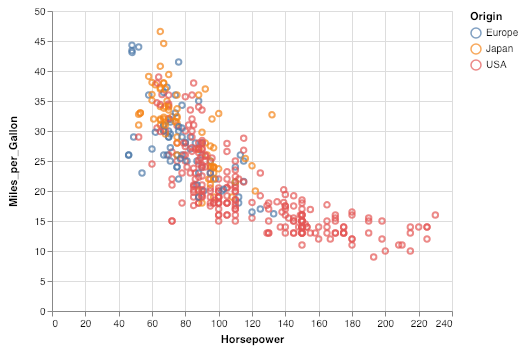

In [4]:
# load a simple dataset as a pandas DataFrame
from vega_datasets import data
cars = data.cars()

alt.Chart(cars).mark_point().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color='Origin',
).interactive()